In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../input/train_folds.csv")
df.head(3)

,id,target,file_path,fold
0,00000e74ad,1,input/train/0/0/0/00000e74ad.npy,2
1,00001f4945,0,input/train/0/0/0/00001f4945.npy,1
2,0000661522,0,input/train/0/0/0/0000661522.npy,3


In [10]:
import torch

In [4]:
states_1d = [torch.load(f"../final_models/b7_1d/tf_efficientnet_b7_ns_fold{fold}_best_score.pth") for fold in range(5)]

In [5]:
states_3d = [torch.load(f"../final_models/b7_3d/tf_efficientnet_b7_ns_fold{fold}_best_score.pth") for fold in range(5)]

In [7]:
oof_df = pd.DataFrame()
for fold in range(5):
    preds_1d = states_1d[fold]['preds'].flatten()
    preds_3d = states_3d[fold]['preds'].flatten()
    _df = df[df['fold'] == fold].reset_index(drop=True)
    _df['preds_1d'] = preds_1d
    _df['preds_3d'] = preds_3d
    oof_df = pd.concat([oof_df, _df])

In [8]:
oof_df

,id,target,file_path,fold,preds_1d,preds_3d
0,00010beb4a,1,input/train/0/0/0/00010beb4a.npy,0,0.376221,0.378174
1,00014b7a9d,1,input/train/0/0/0/00014b7a9d.npy,0,0.204834,0.196777
2,0001c76f56,1,input/train/0/0/0/0001c76f56.npy,0,0.745117,0.497070
3,0002b883f5,0,input/train/0/0/0/0002b883f5.npy,0,0.191895,0.239746
4,00034d8429,0,input/train/0/0/0/00034d8429.npy,0,0.217163,0.168335
...,...,...,...,...,...,...
111995,fffde18882,0,input/train/f/f/f/fffde18882.npy,4,0.240601,0.279053
111996,fffdf87619,1,input/train/f/f/f/fffdf87619.npy,4,1.000000,1.000000
111997,fffe81f2ec,0,input/train/f/f/f/fffe81f2ec.npy,4,0.166382,0.161011
111998,ffff1a0fee,1,input/train/f/f/f/ffff1a0fee.npy,4,0.824707,0.999023


In [9]:
from sklearn.metrics import roc_auc_score

In [14]:
roc_auc_score(oof_df[oof_df['preds_3d'] <  0.5].target.values, oof_df[oof_df['preds_3d'] < 0.5].preds_3d.values)

0.6547041134025768

In [15]:
oof_df[oof_df['preds_3d'] < 0.5].to_csv('../input/train_folds_poor.csv', index=False)

In [141]:
roc_auc_score(oof_df[oof_df['fold'] == 0].target.values, oof_df[oof_df['fold'] == 0].preds_3d.values), roc_auc_score(oof_df.target.values, oof_df.preds_3d.values)

(0.8737153938929264, 0.8742437809858996)

In [10]:
oof_df[oof_df['target'] == 0].sort_values("preds_3d")

,id,target,file_path,fold,preds_1d,preds_3d
32398,4a1fe94ef7,0,input/train/4/a/1/4a1fe94ef7.npy,2,0.066345,0.051849
95982,dba4317b68,0,input/train/d/b/a/dba4317b68.npy,0,0.042633,0.052826
29895,43cae8d842,0,input/train/4/3/c/43cae8d842.npy,3,0.055206,0.054688
78547,b3c68853d6,0,input/train/b/3/c/b3c68853d6.npy,0,0.037750,0.055206
22208,325de409c1,0,input/train/3/2/5/325de409c1.npy,3,0.041229,0.055298
...,...,...,...,...,...,...
31526,48513a1d52,0,input/train/4/8/5/48513a1d52.npy,1,0.994629,0.999512
98030,e021b69f43,0,input/train/e/0/2/e021b69f43.npy,4,0.983887,0.999512
87783,c88d35bf6a,0,input/train/c/8/8/c88d35bf6a.npy,4,0.978516,1.000000
49086,70219e19e8,0,input/train/7/0/2/70219e19e8.npy,3,1.000000,1.000000


<AxesSubplot:>

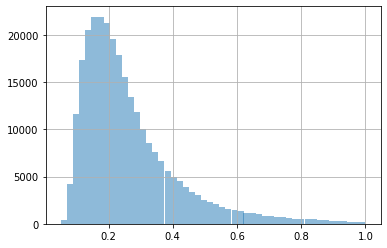

In [17]:
oof_df[oof_df['target'] == 0].preds_3d.hist(bins=50, alpha=0.5)

<AxesSubplot:>

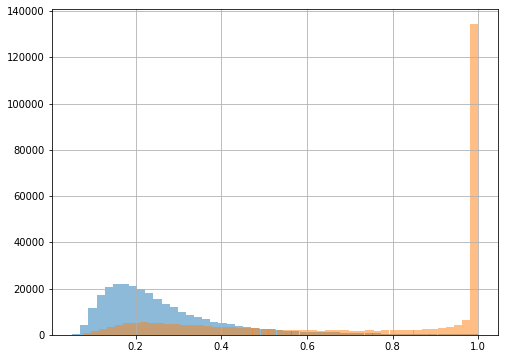

In [145]:
# oof_df.preds_1d.hist(bins=50, alpha=0.5)
oof_df[oof_df['target'] == 0].preds_3d.hist(bins=50, alpha=0.5)
oof_df[oof_df['target'] == 1].preds_3d.hist(bins=50, alpha=0.5)

In [148]:
oof_df[(oof_df['target'] == 1) & (oof_df['preds_3d'] < 0.2)].sort_values('preds_3d')

,id,target,file_path,fold,preds_1d,preds_3d
135,004b9631f5,1,input/train/0/0/4/004b9631f5.npy,4,0.067688,0.058350
22978,3423e21d54,1,input/train/3/4/2/3423e21d54.npy,0,0.058899,0.058655
9528,15beb25a3b,1,input/train/1/5/b/15beb25a3b.npy,0,0.070068,0.058990
106728,f4129980e2,1,input/train/f/4/1/f4129980e2.npy,0,0.049774,0.059875
51872,76754f261f,1,input/train/7/6/7/76754f261f.npy,2,0.079651,0.061523
...,...,...,...,...,...,...
29640,43ebb54978,1,input/train/4/3/e/43ebb54978.npy,1,0.255371,0.199829
102359,ea150861bd,1,input/train/e/a/1/ea150861bd.npy,1,0.295654,0.199829
57973,852e0bd970,1,input/train/8/5/2/852e0bd970.npy,1,0.173096,0.199829
84616,c13b08e0bc,1,input/train/c/1/3/c13b08e0bc.npy,4,0.159180,0.199829


In [5]:
from nnAudio.Spectrogram import CQT1992v2, MelSpectrogram

In [4]:
import pandas as pd
import numpy as np
import umap
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import torch.nn.functional as F

In [3]:
plt.rcParams["figure.figsize"] = (8,6)

NameError: name 'plt' is not defined

In [6]:
wave_transform = CQT1992v2(sr=2048, fmin=20, fmax=512, hop_length=16)

CQT kernels created, time used = 0.0419 seconds


/home/hamsh/anaconda3/envs/rapids-v4/lib/python3.8/site-packages/nnAudio/utils.py:326: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn('If fmax is given, n_bins will be ignored',SyntaxWarning)


In [7]:
s = np.load("../input/train/0/0/4/004b9631f5.npy")

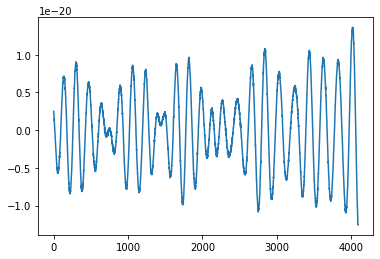

In [8]:
plt.plot(s[0])

In [13]:
tfm_0 = wave_transform(torch.from_numpy(s[0] / 4.615211621383077e-20).float())
tfm_0 = F.interpolate(tfm_0, 224)
tfm_1 = wave_transform(torch.from_numpy(s[1]).float())
tfm_2 = wave_transform(torch.from_numpy(s[2]).float())

tfm = np.vstack([tfm_0, tfm_1, tfm_2])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 224 and the array at index 1 has size 257

In [12]:
f = tfm[0]
f = F.interpolate(f, 224)

# f = albumentations.CoarseDropout(p=1)(image=torch.from_numpy(f).float())

plt.imshow(f)

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [45]:
ms = MelSpectrogram(sr=2048, fmin=20, fmax=512, hop_length=16)

STFT kernels created, time used = 0.1008 seconds
STFT filter created, time used = 0.0041 seconds
Mel filter created, time used = 0.0042 seconds


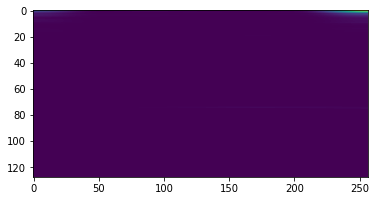

In [46]:
plt.imshow(ms(torch.from_numpy(s[0] / 4.615211621383077e-20).float())[0])

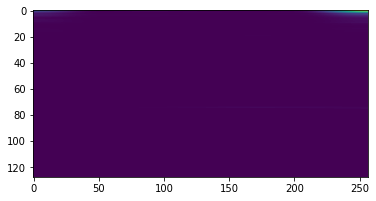

In [47]:
plt.imshow(ms(torch.from_numpy(s[0]).float())[0])

In [ ]:
0.229, 0.224, 0.225

In [86]:
wave_transform(torch.from_numpy(s[0]).float())[0].std(), wave_transform(torch.from_numpy(s[0] / 3e-21).float())[0].std()

(tensor(7.7112e-22), tensor(0.2569))

In [89]:
wave_transform(torch.from_numpy(s[1]).float())[0].std(), wave_transform(torch.from_numpy(s[1] / 2e-21).float())[0].std()

(tensor(4.3612e-22), tensor(0.2178))

In [92]:
wave_transform(torch.from_numpy(s[2]).float())[0].std(), wave_transform(torch.from_numpy(s[2] / 3.5e-21).float())[0].std()

(tensor(8.2970e-22), tensor(0.2370))

In [24]:
# A = oof_df.preds_low.values
# B = oof_df.preds_3d.values
# targets = oof_df.target.values
# for i in range(1, 50):
#     a = i*0.01
#     b = 1 - a
#     #0.8753788865670478
#     y_hat = a*(A) + b*(B)
#     score = roc_auc_score(targets, y_hat)

#     print(i*0.01, score)

In [21]:
wave_transform = CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=32)

CQT kernels created, time used = 0.0543 seconds


/home/hamsh/anaconda3/envs/rapids-v4/lib/python3.8/site-packages/nnAudio/utils.py:326: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn('If fmax is given, n_bins will be ignored',SyntaxWarning)


In [22]:
import albumentations

In [23]:
f = tfm[0]

# f = albumentations.CoarseDropout(p=1)(image=torch.from_numpy(f).float())

plt.imshow(f)

NameError: name 'tfm' is not defined

In [139]:
f = tfm[0]
f

array([[0.06524974, 0.06549878, 0.06606296, ..., 0.00993049, 0.0092172 ,
        0.00887914],
       [0.086707  , 0.08539548, 0.08221415, ..., 0.01378825, 0.01286102,
        0.01233753],
       [0.08285854, 0.08231926, 0.08117812, ..., 0.01307679, 0.01368399,
        0.0139492 ],
       ...,
       [0.00253807, 0.00273272, 0.00235364, ..., 0.00266861, 0.00378807,
        0.00405081],
       [0.0032512 , 0.00327437, 0.00210702, ..., 0.00361466, 0.00487405,
        0.00196566],
       [0.00455108, 0.00161456, 0.00307376, ..., 0.0037418 , 0.00583993,
        0.00013643]], dtype=float32)

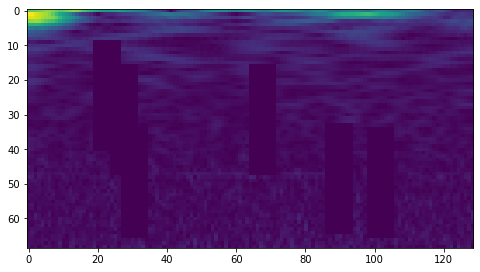

In [140]:
f = tfm[0]

f = albumentations.CoarseDropout(p=1, min_holes=5, max_height=32, max_width=8)(image=f)


plt.imshow(f['image'])

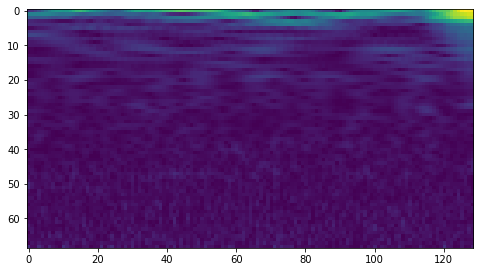

In [127]:
plt.imshow(tfm[1])

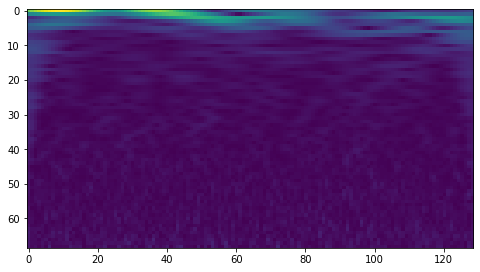

In [108]:
plt.imshow(tfm[2])

In [1]:
import timm

In [2]:
timm.list_models(pretrained=True)

['adv_inception_v3',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dm_nfnet_f0',
 'dm_nfnet_f1',
 'dm_nfnet_f2',
 'dm_nfnet_f3',
 'dm_nfnet_f4',
 'dm_nfnet_f5',
 'dm_nfnet_f6',
 'dpn68',
 'dpn

In [2]:
import timm

In [3]:
        model = timm.create_model(
            "xcit_tiny_12_p8_224", pretrained=True, in_chans=3
        )

Downloading: "https://dl.fbaipublicfiles.com/xcit/xcit_tiny_12_p8_224.pth" to /home/hamsh/.cache/torch/hub/checkpoints/xcit_tiny_12_p8_224.pth


In [4]:
model

XCiT(
  (patch_embed): ConvPatchEmbed(
    (proj): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GELU()
      (2): Sequential(
        (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): GELU()
      (4): Sequential(
        (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (pos_embed): PositionalEncodingFourier(
    (token_projection): Conv2d(64, 192, kernel_size=(1, 1), stride=(1, 1))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): XCABlock(
      (norm1): LayerNorm((192,), eps=